In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
iris = load_iris()
X = iris['data'][:100]  # Use only the first 100 samples (2 classes: binary classification)
y = iris['target'][:100].reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# Initialize weights and bias
input_dim = X_scaled.shape[1]
output_dim = y_encoded.shape[1]
weights = np.random.randn(input_dim, output_dim)
bias = np.random.randn(output_dim)

# Forward pass
z = np.dot(X_scaled, weights) + bias
manual_preds = sigmoid(z)

In [5]:
# Build simple model with same shape
model = Sequential([
    Dense(output_dim, activation='sigmoid', input_shape=(input_dim,))
])

# Set the weights and bias to the same values used manually
model.set_weights([weights, bias])

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Predict using Keras
keras_preds = model.predict(X_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


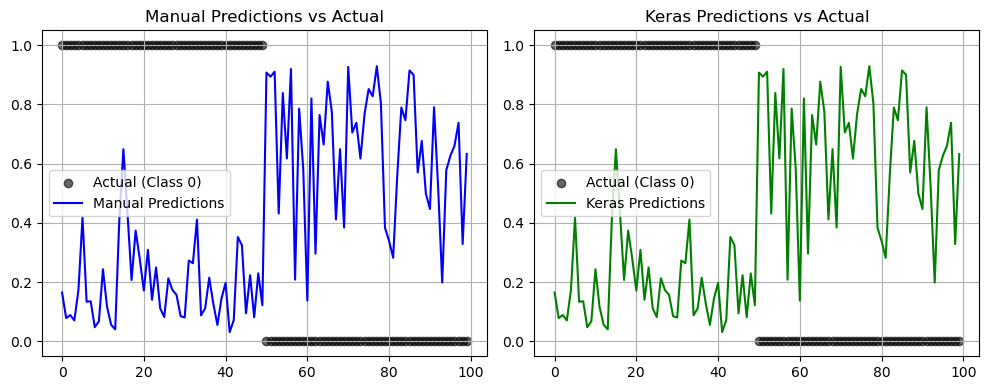

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(range(100), y_encoded[:, 0], label='Actual (Class 0)', color='black', alpha=0.6)
plt.plot(manual_preds[:, 0], label='Manual Predictions', color='blue')
plt.title("Manual Predictions vs Actual")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(100), y_encoded[:, 0], label='Actual (Class 0)', color='black', alpha=0.6)
plt.plot(keras_preds[:, 0], label='Keras Predictions', color='green')
plt.title("Keras Predictions vs Actual")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
